In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./Admission_Predict_Ver1.1.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.duplicated().sum()

0

In [11]:
df.drop('Serial No.',axis=1,inplace=True)

In [12]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [63]:
model = Sequential()

In [64]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(loss='huber_loss',optimizer='Adam')

In [78]:
history = model.fit(X_train_scaled,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
10/10 [==============================] - 1s 23ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 2/150
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 4/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 5/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/150
10/10 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 7/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 8/150
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 9/150
10/10 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/150
10/10 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 11

In [79]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8208589840089338
0.0034593921598034803
0.039611897850036625


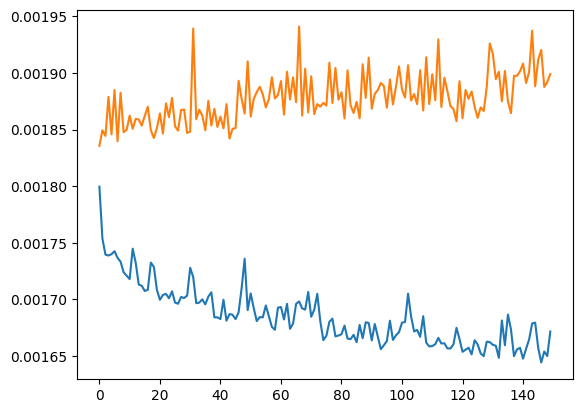

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])